# **Medical Cost Prediction: Machine Learning Workflow for Regression Tasks**

## Overview
##### This notebook is an step-by-step instruction to train a machine learning model to prediction medical insurance cost based on insrued age, sex, BMI, children, smoking history, and region in the United States. Following topics will be discussed:

##### 1. Python packages requirements
##### 2. Loading data and exploratory data analsys (EDA)
##### 3. Data cleaning and preprocessing
##### 4. Model training and optimization 
##### 5. Model evaluation using key metrics

##### **1. Python packages requirements**

In [15]:
# Loading data
import numpy as np 
import pandas as pd 

# Exploratory data analsys (EDA) 
import matplotlib.pyplot as pl
import seaborn as sns
import warnings

# Data cleaning and preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Model training and optimization 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.ensemble import GradientBoostingRegressor

# Model evaluation 
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score, mean_squared_error

##### **2. Loading data and exploratory data analsys (EDA)**

In [16]:
import numpy as np 
import pandas as pd 
warnings.filterwarnings('ignore')

df = pd.read_csv("../data/medical_cost_personal_datasets.csv")

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [18]:
data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


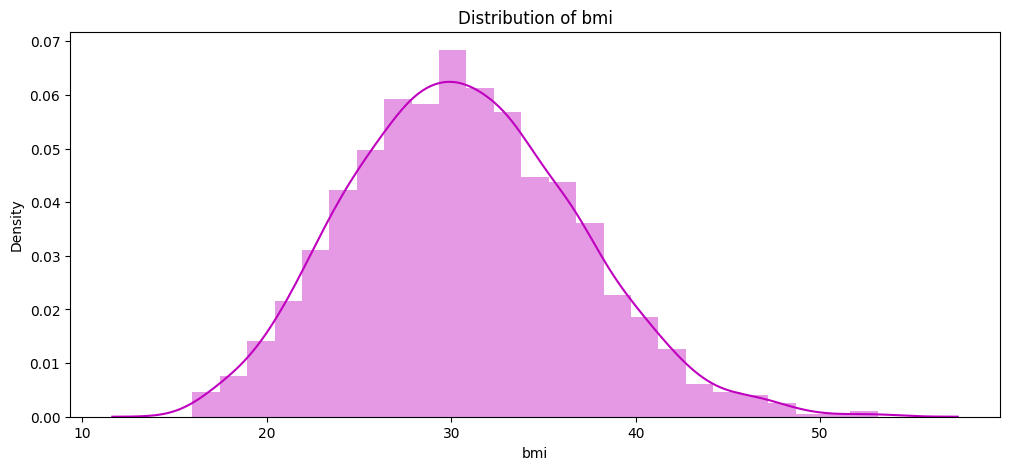

In [19]:
pl.figure(figsize=(12,5))
pl.title("Distribution of bmi")
ax = sns.distplot(df["bmi"], color = 'm')

##### **3. Data cleaning and preprocessing**

In [24]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [30]:
# preprocessing for plotting
from sklearn.preprocessing import LabelEncoder
#sex
le = LabelEncoder()
le.fit(df.sex.drop_duplicates()) 
df.sex = le.transform(df.sex)
# smoker or not
le.fit(df.smoker.drop_duplicates()) 
df.smoker = le.transform(df.smoker)
#region
le.fit(df.region.drop_duplicates()) 
df.region = le.transform(df.region)

In [31]:
df.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

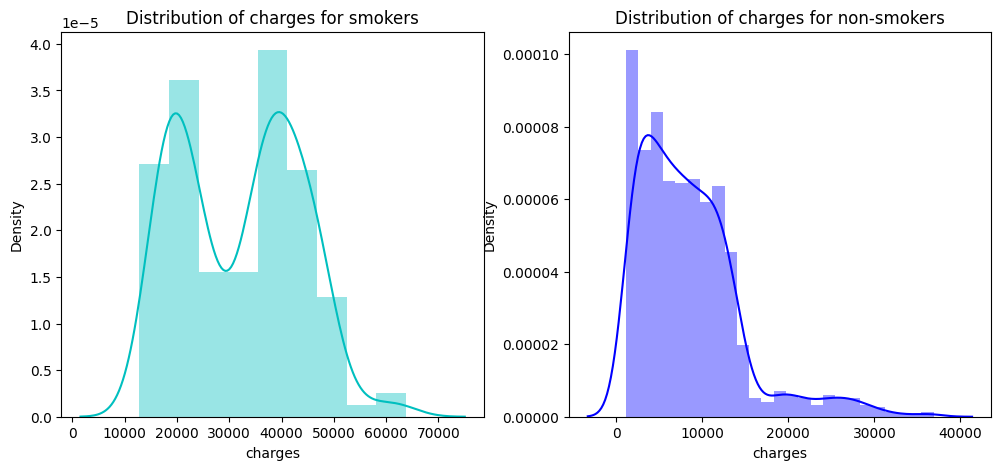

In [32]:
# plotting
import matplotlib.pyplot as pl
import seaborn as sns

f= pl.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(df[(df.smoker == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(df[(df.smoker == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

<Axes: >

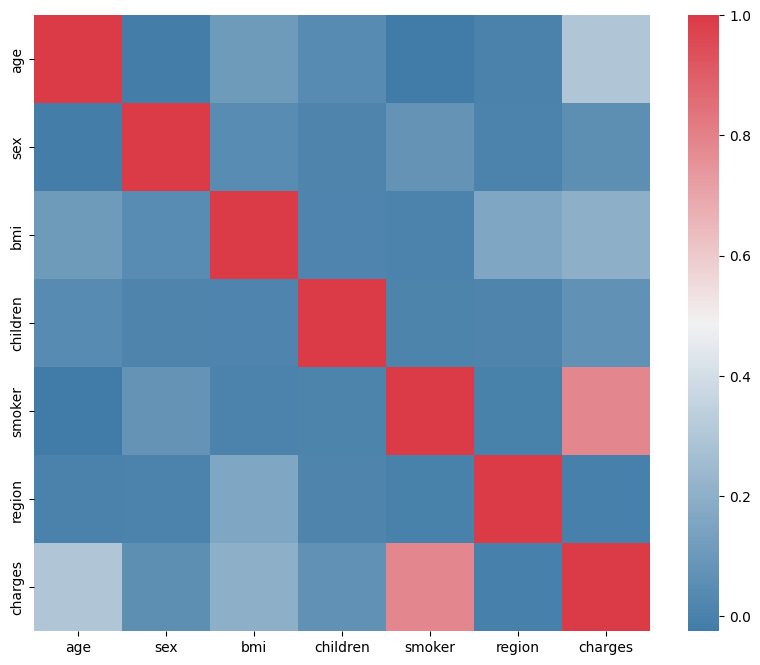

In [33]:
f, ax = pl.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

##### **4. Model training and optimization** (gridsearch to be added)

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.ensemble import HistGradientBoostingRegressor

X = df.drop(['charges'], axis = 1)
y = df.charges

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

lrg = make_pipeline(StandardScaler(), LinearRegression())
lrg.fit(X_train, y_train)

pls = make_pipeline(StandardScaler(), PLSRegression(n_components = 3))
pls.fit(X_train, y_train)

rfr = make_pipeline(StandardScaler(), RandomForestRegressor(n_estimators = 100, random_state = 1, n_jobs = -1))
rfr.fit(X_train, y_train)

gbr = make_pipeline(StandardScaler(), HistGradientBoostingRegressor(random_state=0))
gbr.fit(X_train, y_train)

print(f"LRG r-squared {lrg.score(X_test, y_test):.3f}")
print(f"PLS r-squared {pls.score(X_test, y_test):.3f}")
print(f"RFR r-squared {rfr.score(X_test, y_test):.3f}")
print(f"GBR r-squared {gbr.score(X_test, y_test):.3f}")

LRG r-squared 0.741
PLS r-squared 0.741
RFR r-squared 0.820
GBR r-squared 0.826


##### **5. Model evaluation** (code need optimization)

In [35]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score, mean_squared_error

model = gbr

y_train_pred = model.predict(X_train);
y_train_cvpred = cross_val_predict(model, X_train, y_train, cv=7);
y_test_pred = model.predict(X_test);

print(f'R2 train data: {r2_score(y_train, y_train_pred):.2f} , '
      f'R2 train data CV: {r2_score(y_train, y_train_cvpred):.2f} , '
      f'R2 test data: {r2_score(y_test, y_test_pred):.2f}')

print(f'RMSE train data: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.2f} , '
      f'RMSE train data CV: {np.sqrt(mean_squared_error(y_train, y_train_cvpred)):.2f} , '
      f'RMSE test data: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.2f}')

print(f'NRMSE train data: %{100*np.sqrt(mean_squared_error(y_train, y_train_pred))/(y_train.max()-y_train.min()):.2f} , '
      f'NRMSE train data CV: %{100*np.sqrt(mean_squared_error(y_train, y_train_cvpred))/(y_train.max()-y_train.min()):.2f} , '
      f'NRMSE test data: %{100*np.sqrt(mean_squared_error(y_test, y_test_pred))/(y_test.max()-y_test.min()):.2f}')

R2 train data: 0.95 , R2 train data CV: 0.85 , R2 test data: 0.83
RMSE train data: 2812.37 , RMSE train data CV: 4786.89 , RMSE test data: 4941.06
NRMSE train data: %4.49 , NRMSE train data CV: %7.64 , NRMSE test data: %9.15
